<a href="https://colab.research.google.com/github/Saimon0007/Data-Processing/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [64]:
df = pd.read_csv('heart.csv')
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [66]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Cleaning

In [67]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    if df[col].nunique() < 50:
        print(df[col].unique())
    else:
        print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 30)

Unique values in column 'Age':
Number of unique values: 50
------------------------------
Unique values in column 'Sex':
['M' 'F']
------------------------------
Unique values in column 'ChestPainType':
['ATA' 'NAP' 'ASY' 'TA']
------------------------------
Unique values in column 'RestingBP':
Number of unique values: 67
------------------------------
Unique values in column 'Cholesterol':
Number of unique values: 222
------------------------------
Unique values in column 'FastingBS':
[0 1]
------------------------------
Unique values in column 'RestingECG':
['Normal' 'ST' 'LVH']
------------------------------
Unique values in column 'MaxHR':
Number of unique values: 119
------------------------------
Unique values in column 'ExerciseAngina':
['N' 'Y']
------------------------------
Unique values in column 'Oldpeak':
Number of unique values: 53
------------------------------
Unique values in column 'ST_Slope':
['Up' 'Flat' 'Down']
------------------------------
Unique values in column

In [70]:
for col in df.columns:
    print(f"Column '{col}': {df[col].dtype}")

Column 'Age': int64
Column 'Sex': object
Column 'ChestPainType': object
Column 'RestingBP': int64
Column 'Cholesterol': int64
Column 'FastingBS': int64
Column 'RestingECG': object
Column 'MaxHR': int64
Column 'ExerciseAngina': object
Column 'Oldpeak': float64
Column 'ST_Slope': object
Column 'HeartDisease': int64


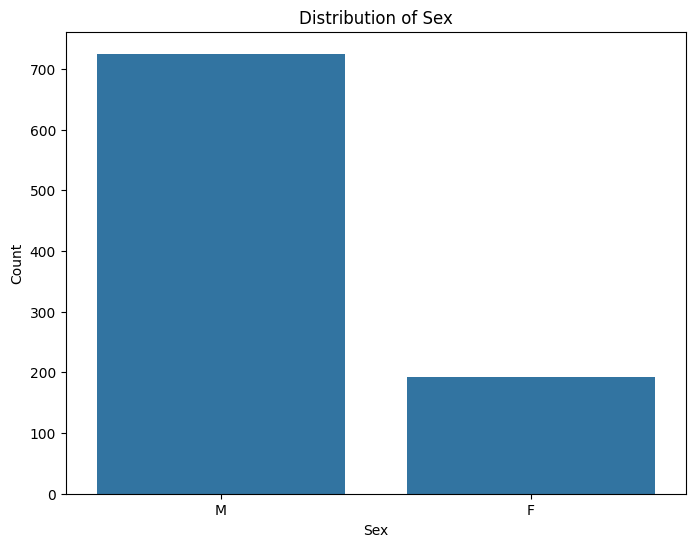

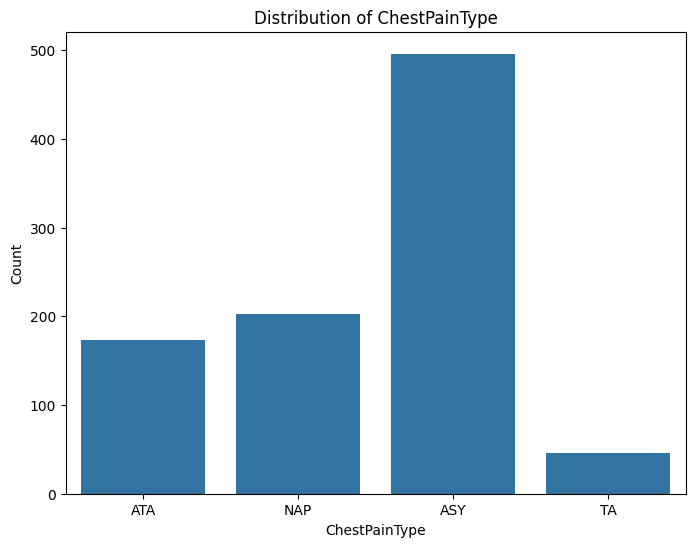

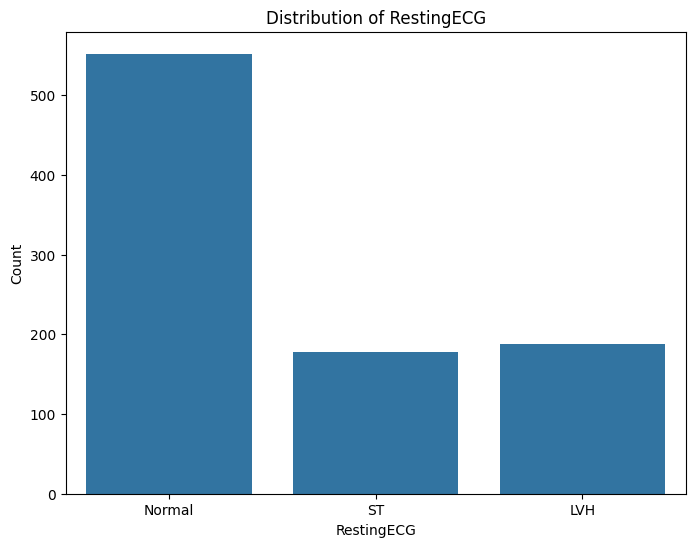

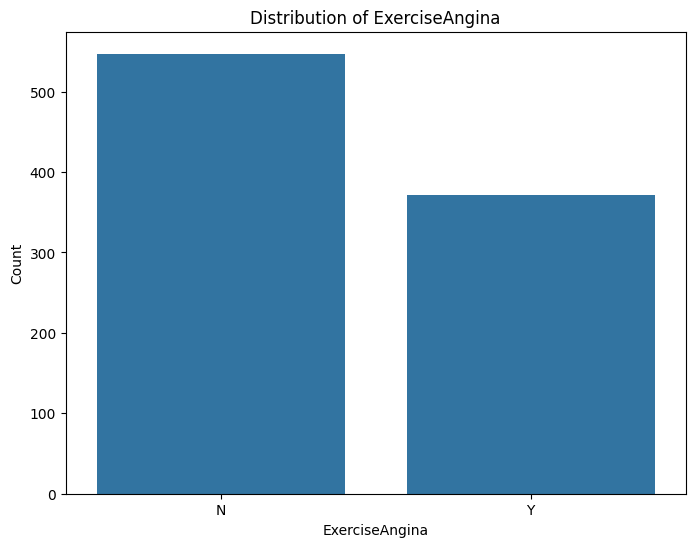

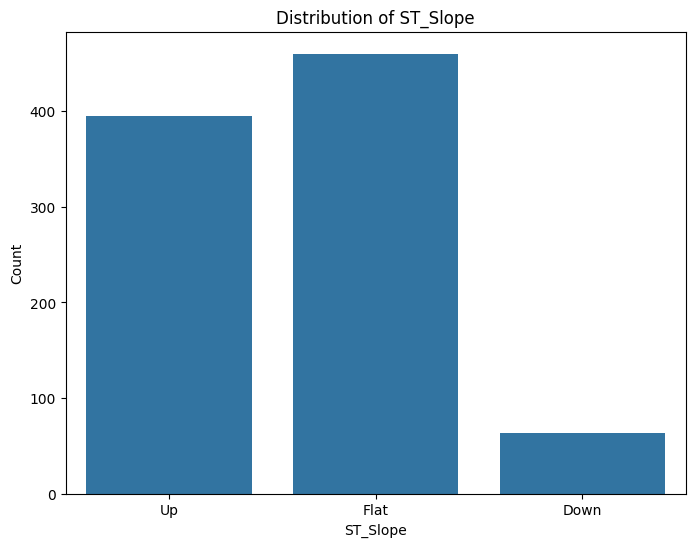

In [71]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0) # Rotate labels if needed
    plt.show()

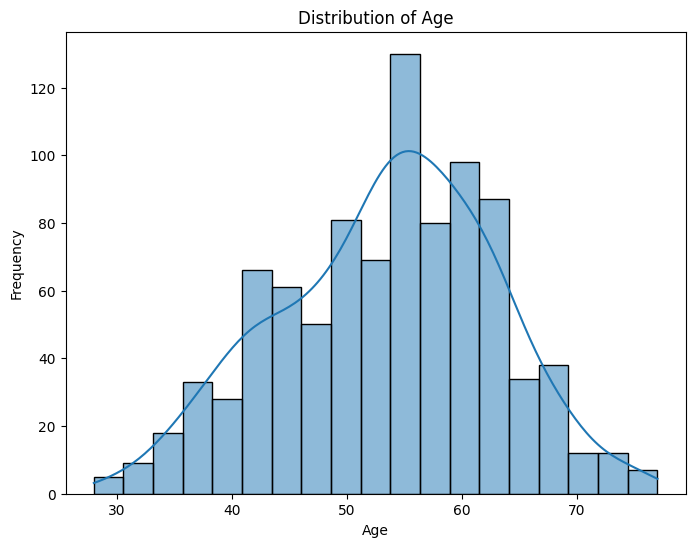

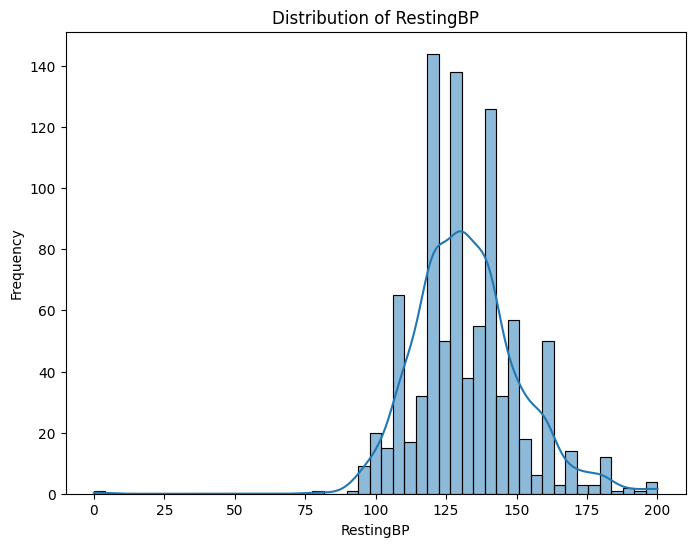

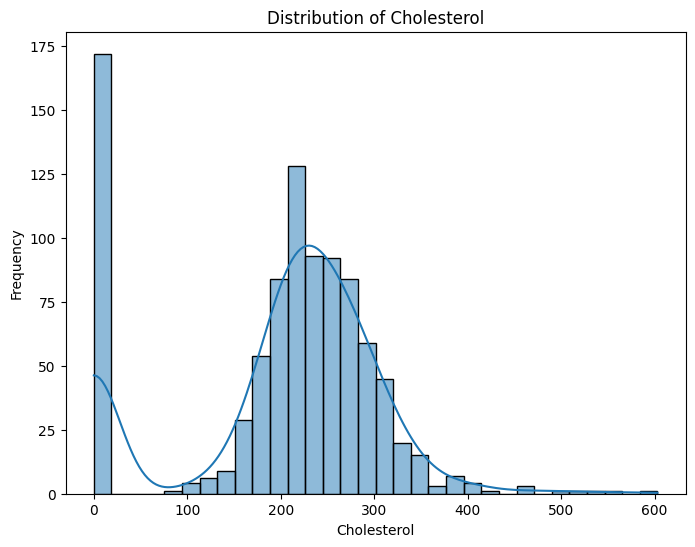

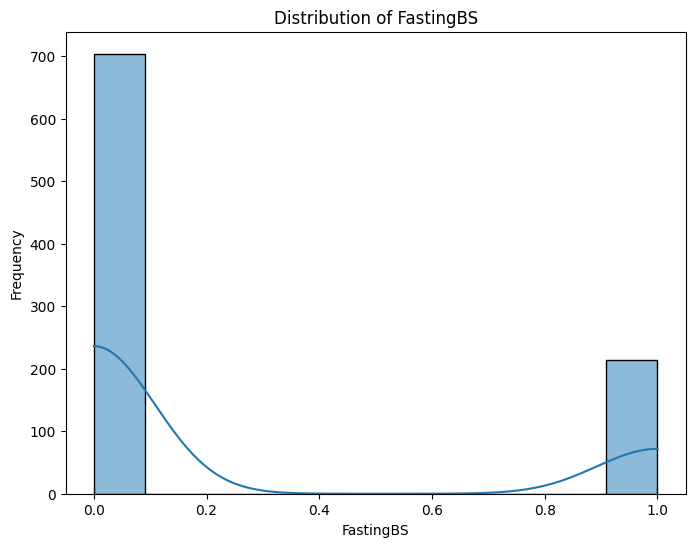

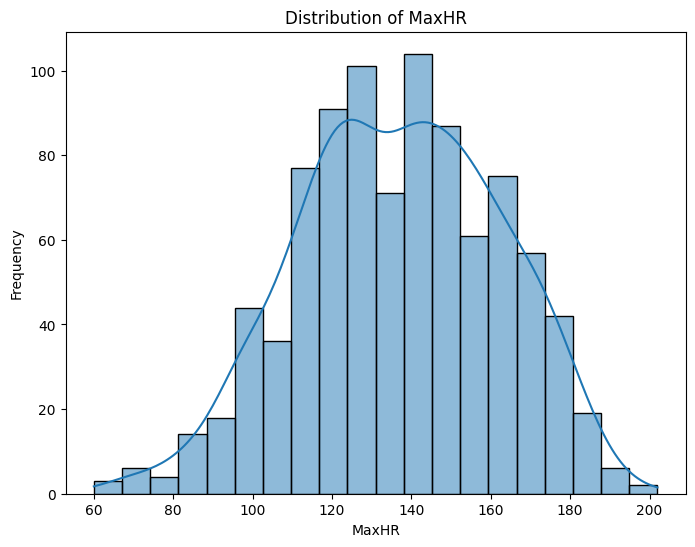

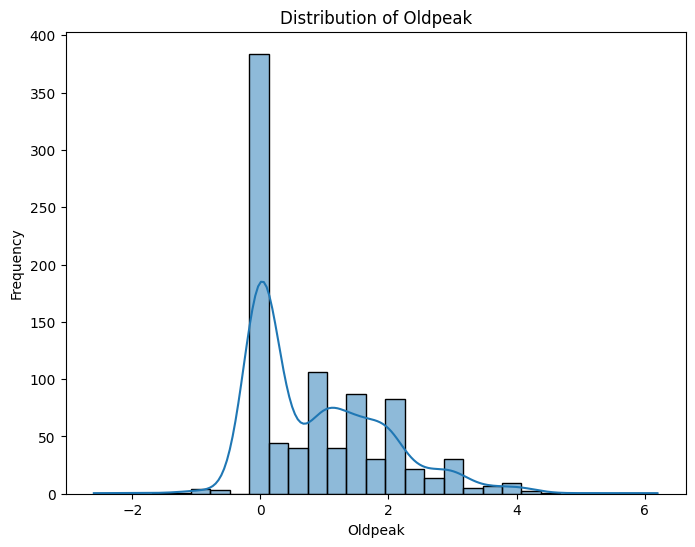

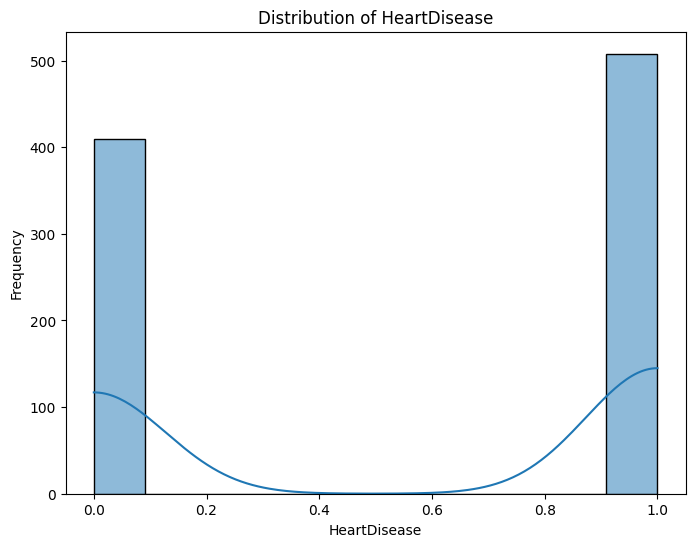

In [72]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Sex: There are significantly more male patients than female patients in the dataset.

ChestPainType: The most common type of chest pain is ASY (asymptomatic), followed by NAP (non-anginal pain), ATA (atypical angina), and TA (typical angina).

RestingECG: The majority of patients have a Normal Resting ECG, followed by LVH (left ventricular hypertrophy) and ST (ST-T wave abnormality).

ExerciseAngina: More patients do not experience exercise-induced angina compared to those who do.

ST_Slope: The most frequent ST segment slope is Up, followed by Flat and then Down.
Age: The age distribution appears to be somewhat normal, with a peak around 50-60 years old.

RestingBP: The resting blood pressure distribution is skewed slightly to the right, with most values falling between 120 and 140.

Cholesterol: The cholesterol distribution is also skewed, with a significant number of patients having 0 cholesterol. This might indicate missing values or a specific coding.

FastingBS: The majority of patients have a fasting blood sugar less than 120 mg/dL (FastingBS = 0).

MaxHR: The maximum heart rate achieved during exercise is distributed somewhat normally, with a peak around 140-160 bpm.
Oldpeak: The Oldpeak distribution is skewed to the right, with many patients having a value of 0.

HeartDisease: There are slightly more patients with heart disease (HeartDisease = 1) than without (HeartDisease = 0).

Encoding

In [74]:
nominal_features = ['ChestPainType', 'RestingECG', 'ST_Slope']
binary_features = ['Sex', 'ExerciseAngina']           # binary columns (0/1 or yes/no)

# ---- Label Encoding for Binary Features ----
label_encoder = LabelEncoder()
for col in binary_features:
    df[col] = label_encoder.fit_transform(df[col])

# ---- One-Hot Encoding for Nominal Features ----
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# ---- Result ----
print("\nEncoded Dataset Preview:")
print(df.head())


Encoded Dataset Preview:
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0               True              False   
1      1.0             1              False               True   
2      0.0             0               True              False   
3      1.5             1              False              False   
4      0.0             0              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0             False               True          False          Fal

In [75]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


In [76]:
boolean_cols = df.select_dtypes(include='bool').columns
for col in boolean_cols:
    df[col] = df[col].astype(int)

display(df.head())

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


correlation checking

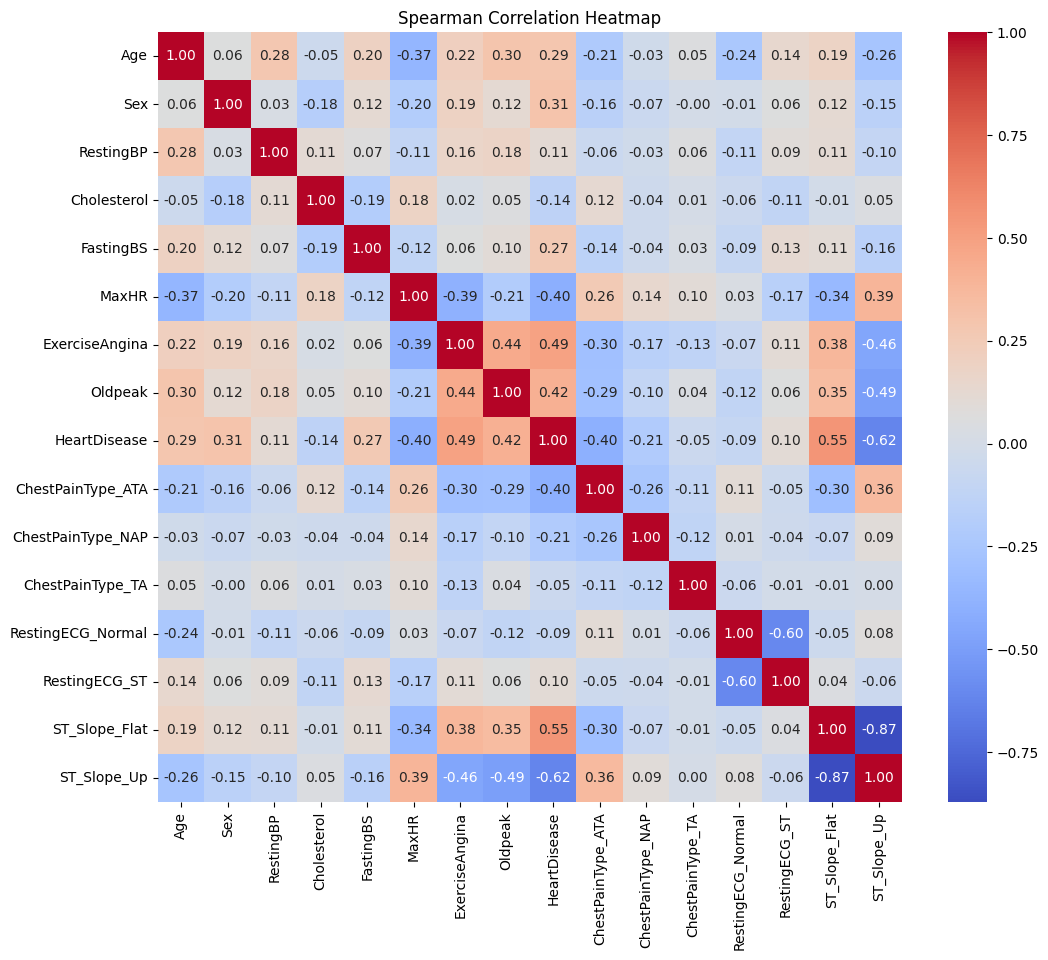

In [77]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

In [78]:
corr_matrix = df.corr(method='spearman')
stacked_corr = corr_matrix.stack()

# Filter for correlations greater than 0.8 (excluding self-correlation)
high_corr = stacked_corr[(stacked_corr > 0.8) & (stacked_corr < 1.0)]

if high_corr.empty:
    print("No feature pairs found with a Spearman correlation greater than 0.8.")
else:
    print("Feature pairs with Spearman correlation > 0.8:")
    print(high_corr)

No feature pairs found with a Spearman correlation greater than 0.8.


In [79]:
variances = df.var()
print("Variances of each column:")
print(variances)

# Set a threshold for low variance
variance_threshold = 0.02

# Identify columns with variance below the threshold
low_variance_cols = variances[variances < variance_threshold].index.tolist()

print(f"\nColumns with variance below {variance_threshold}:")
print(low_variance_cols)

# Drop the low variance columns
if low_variance_cols:
    df = df.drop(columns=low_variance_cols)
    print(f"\nDropped columns: {low_variance_cols}")
else:
    print("\nNo columns found with variance below the threshold.")

display(df.head())

Variances of each column:
Age                     88.974254
Sex                      0.166220
RestingBP              342.773903
Cholesterol          11964.891079
FastingBS                0.178968
MaxHR                  648.228614
ExerciseAngina           0.241073
Oldpeak                  1.137572
HeartDisease             0.247420
ChestPainType_ATA        0.153105
ChestPainType_NAP        0.172421
ChestPainType_TA         0.047650
RestingECG_Normal        0.239998
RestingECG_ST            0.156473
ST_Slope_Flat            0.250271
ST_Slope_Up              0.245407
dtype: float64

Columns with variance below 0.02:
[]

No columns found with variance below the threshold.


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


In [80]:
df.to_csv('processed_heart.csv', index=False)
print("Processed dataframe saved to 'processed_heart.csv'")

Processed dataframe saved to 'processed_heart.csv'
